In [96]:
!pip install kaggle

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import sklearn as sk

In [3]:
df=pd.read_csv("abc.csv")
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

<Axes: >

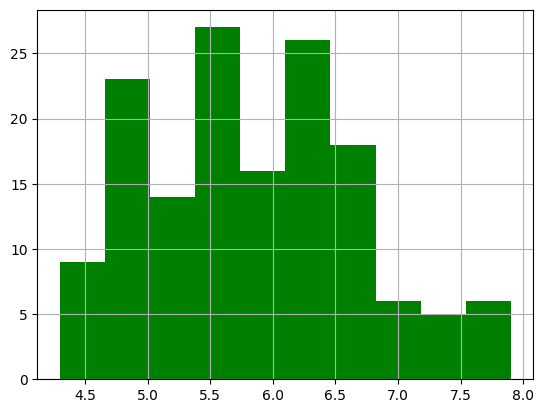

In [7]:
df['SepalLength'].hist(color='green')

<Axes: >

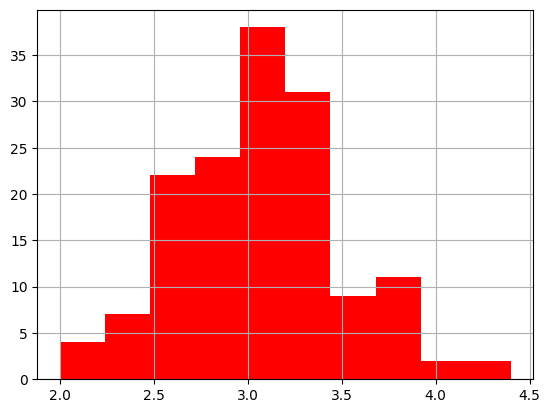

In [8]:
df['SepalWidth'].hist(color='red')

<Axes: >

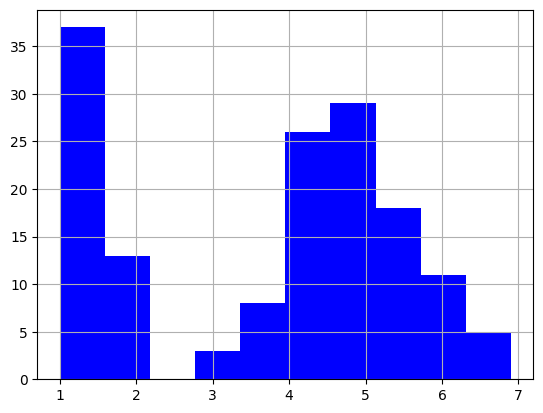

In [9]:
df['PetalLength'].hist(color='blue')

<Axes: >

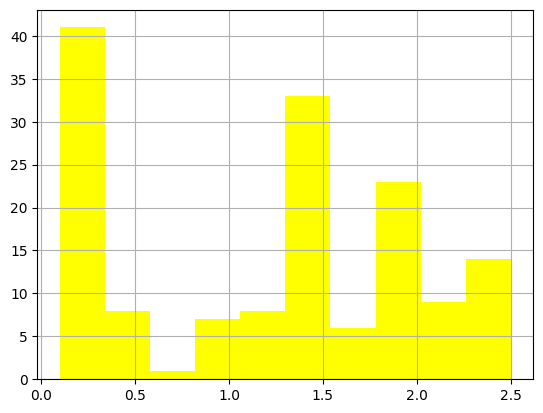

In [10]:
df['PetalWidth'].hist(color='yellow')

In histogram if its not bell shaped means it is not a normal distribution, so we can say that two classes are merged in that particular histo.
Keep in mind that if the distribution is normal,the model will be able to learn quickly

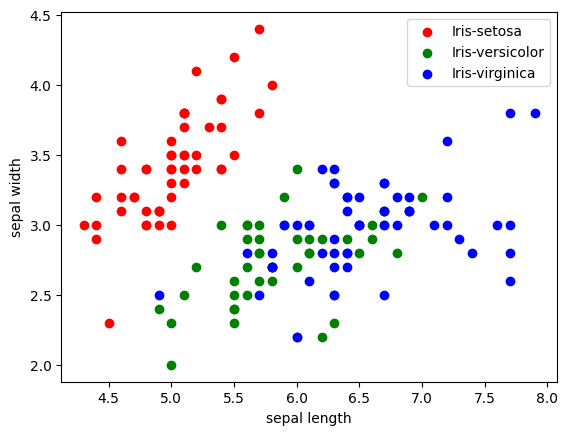

In [11]:
colors=['red','green','blue']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["SepalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.legend()

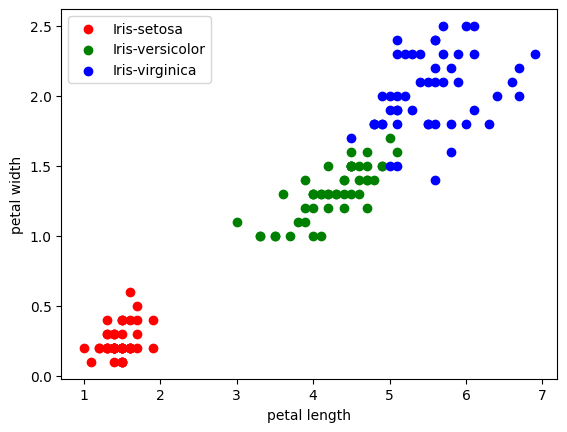

In [12]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["PetalLength"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.legend()

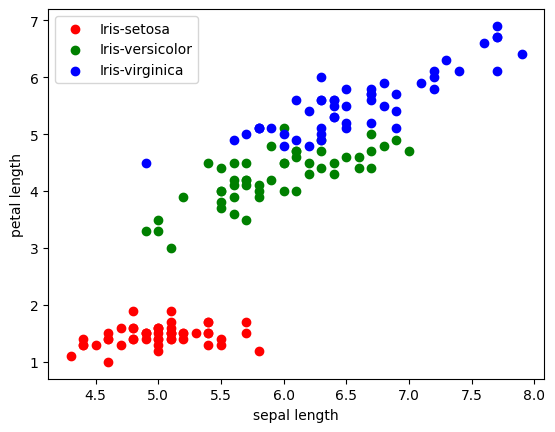

In [13]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalLength"],x["PetalLength"],c=colors[i],label=species[i])
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()

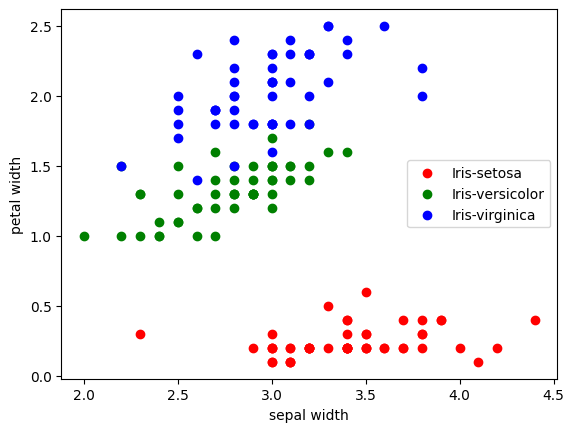

In [14]:
for i in range(3):
    x=df[df['Species']==species[i]]
    plt.scatter(x["SepalWidth"],x["PetalWidth"],c=colors[i],label=species[i])
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.legend()

In [15]:
# Assuming df is your DataFrame
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Now, you can use the correlation_matrix as needed
print(correlation_matrix)


             SepalLength  SepalWidth  PetalLength  PetalWidth
SepalLength     1.000000   -0.109369     0.871754    0.817954
SepalWidth     -0.109369    1.000000    -0.420516   -0.356544
PetalLength     0.871754   -0.420516     1.000000    0.962757
PetalWidth      0.817954   -0.356544     0.962757    1.000000


<Axes: >

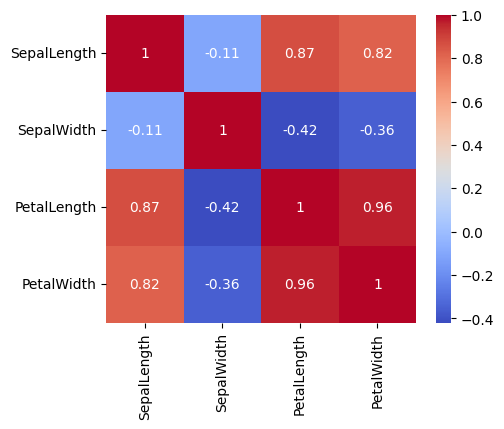

In [16]:
fig,ax=plt.subplots(figsize=(5,4))
sns.heatmap(correlation_matrix,annot=True,ax=ax,cmap="coolwarm")

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Species'])
y=df['Species']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [20]:
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:
model.score(X_test,Y_test)*100

96.66666666666667

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [23]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [24]:
model.score(X_test,Y_test)*100

96.66666666666667

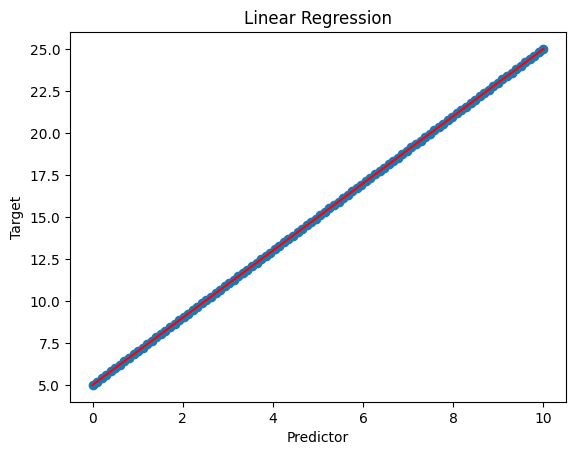

In [25]:
# Create some data
x = np.linspace(0, 10, 100)
y = 2 * x + 5

# Fit a linear regression model
model = np.polyfit(x, y, 1)

# Plot the data and the regression line
plt.scatter(x, y)
plt.plot(x, model[0] * x + model[1], color='red')

# Add labels and title
plt.xlabel('Predictor')
plt.ylabel('Target')
plt.title('Linear Regression')

# Show the plot
plt.show()

In [ ]:
X = df[['sepal_length']]
y = df[['petal_length']]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

In [ ]:
y_pred = model.predict(X)

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

In [ ]:
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Linear Regression of Petal Length on Sepal Length')
plt.show()